In [5]:
import os
import pandas as pd

In [6]:
quast = pd.read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_All_19_Isolates_All_Assemblies_quast_results_analysisfriendly.csv")

In [7]:
quast.head()

,Unnamed: 0,Assembly,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,# contigs (>= 0 bp),# contigs (>= 1000 bp),...,# contigs,Largest contig,Total length,GC (%),N50,N75,L50,L75,# N's per 100 kbp,Isolate_Pathname
0,0,EC_A_4957_3S1_D_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,229,113,...,163,1889750,8064892,50.53,238124,106045,6,19,0,EC-A-4957-3S1-D-CuP-CeN_HLF_quast_output
1,0,EC_A_0012_C5_H_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,6,6,...,6,5060504,5169485,50.53,5060504,5060504,1,1,0,EC-A-0012-C5-H-CuP-CeN_HLF_quast_output
2,0,EC_A_0205_C9_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,7,7,...,7,5070291,5267088,50.46,5070291,5070291,1,1,0,EC-A-0205-C9-H-CuP-CeP_HLF_quast_output
3,0,EC_E_3862_S2_D_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,197,111,...,137,426608,5109279,50.70,197395,71769,10,21,0,EC-E-3862-S2-D-CuP-CeP_HLF_quast_output
4,0,EC_A_4957_C3_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,5,5,...,5,5058920,5301894,50.78,5058920,5058920,1,1,0,EC-A-4957-C3-H-CuP-CeP_HLF_quast_output


In [8]:
quast.rename(columns = {'Total length':'Total_Length'}, inplace = True)

In [9]:
#One way ANOVA for overall effects on Type on Total length of genome
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Total_Length ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.899869


In [10]:
quast.head()

,Unnamed: 0,Assembly,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,# contigs (>= 0 bp),# contigs (>= 1000 bp),...,# contigs,Largest contig,Total_Length,GC (%),N50,N75,L50,L75,# N's per 100 kbp,Isolate_Pathname
0,0,EC_A_4957_3S1_D_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,229,113,...,163,1889750,8064892,50.53,238124,106045,6,19,0,EC-A-4957-3S1-D-CuP-CeN_HLF_quast_output
1,0,EC_A_0012_C5_H_CuP_CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,6,6,...,6,5060504,5169485,50.53,5060504,5060504,1,1,0,EC-A-0012-C5-H-CuP-CeN_HLF_quast_output
2,0,EC_A_0205_C9_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,7,7,...,7,5070291,5267088,50.46,5070291,5070291,1,1,0,EC-A-0205-C9-H-CuP-CeP_HLF_quast_output
3,0,EC_E_3862_S2_D_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Diseased,197,111,...,137,426608,5109279,50.70,197395,71769,10,21,0,EC-E-3862-S2-D-CuP-CeP_HLF_quast_output
4,0,EC_A_4957_C3_H_CuP_CeP,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,5,5,...,5,5058920,5301894,50.78,5058920,5058920,1,1,0,EC-A-4957-C3-H-CuP-CeP_HLF_quast_output


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:6.785e-01 t=4.179e-01
HLUF vs. HRF: t-test independent samples, P_val:3.125e-01 t=1.024e+00
HRF vs. HRUF: t-test independent samples, P_val:9.766e-01 t=-2.953e-02
HLF vs. HRF: t-test independent samples, P_val:2.152e-01 t=1.262e+00
HLF vs. HRUF: t-test independent samples, P_val:2.184e-01 t=1.253e+00


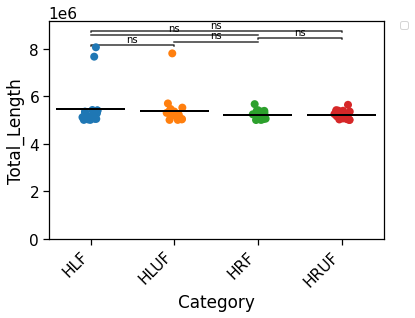

In [11]:
#Figure to show impact of Type on total length of genome specifically in hybrid assemblies; the impact of it is in Long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total_Length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Total_Length", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Total_Length",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1200000)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig('12122022_EcoliPlasmidDetection_S1d.png', dpi=300, bbox_inches="tight")

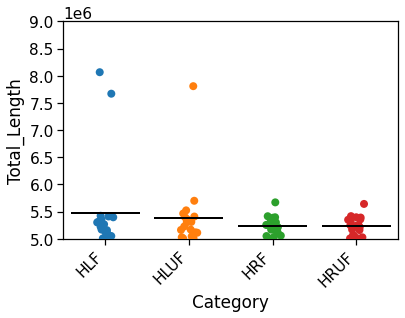

In [12]:
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total_Length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Total_Length", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Total_Length",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
ax.set_ylim([5000000, 9000000])
plt.savefig('12122022_EcoliPlasmidDetection_S1d.png', dpi=300, bbox_inches="tight")

In [13]:
quast.rename(columns = {'Largest contig':'Largest_Contig'}, inplace = True)

In [14]:
#One way ANOVA looking at overall impact of Types on Largest_Contig
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Largest_Contig ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.365391


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:8.232e-01 t=-2.250e-01
HLUF vs. HRF: t-test independent samples, P_val:1.258e-01 t=-1.567e+00
HRF vs. HRUF: t-test independent samples, P_val:2.583e-01 t=1.149e+00
HLF vs. HRF: t-test independent samples, P_val:7.215e-02 t=-1.853e+00
HLF vs. HRUF: t-test independent samples, P_val:2.677e-01 t=-1.126e+00


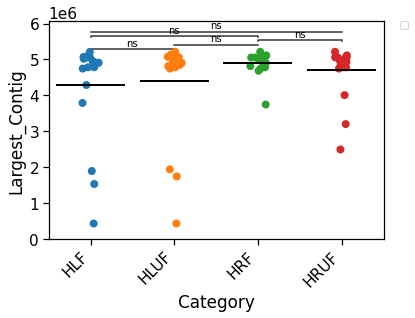

In [15]:
#Figure to show impact of Type on Largest_Contig specifically in hybrid assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest_Contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Largest_Contig", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Largest_Contig",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1000000)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1c.png', dpi=300, bbox_inches="tight")

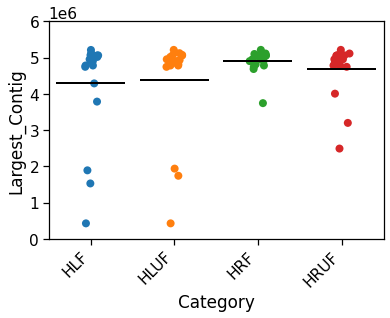

In [16]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest_Contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Largest_Contig", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Largest_Contig",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
plt.ylim(0, 6000000)
plt.savefig('12122022_EcoliPlasmidDetection_S1c.png', dpi=300, bbox_inches="tight")

In [17]:
quast.rename(columns = {'# contigs':'Number_Contigs'}, inplace = True)

In [18]:
#One way ANOVA for overall effects of Type on Number_Contigs
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Number_Contigs ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.020859


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:5.291e-01 t=6.355e-01
HLUF vs. HRF: t-test independent samples, P_val:1.046e-01 t=1.665e+00
HRF vs. HRUF: t-test independent samples, P_val:2.047e-01 t=-1.292e+00
HLF vs. HRF: t-test independent samples, P_val:7.537e-02 t=1.831e+00
HLF vs. HRUF: t-test independent samples, P_val:1.069e-01 t=1.653e+00


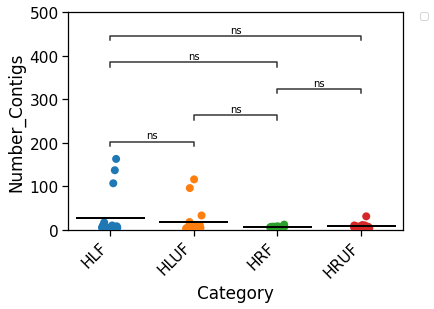

In [19]:
#Figure to show impact of Type on Largest_Contig specifically in hybrid assemblies, effect mostly seen in long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Number_Contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Number_Contigs", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Number_Contigs",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 500)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1b.png', dpi=300, bbox_inches="tight")


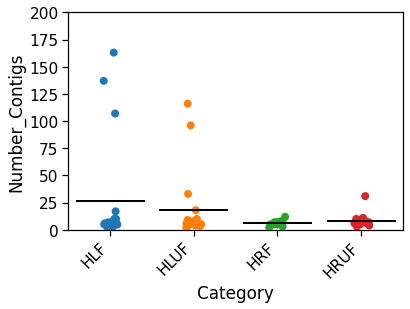

In [20]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Number_Contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Number_Contigs", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Number_Contigs",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
plt.ylim(0, 200)
plt.savefig('12122022_EcoliPlasmidDetection_S1b.png', dpi=300, bbox_inches="tight")

In [21]:
quast.rename(columns = {'GC (%)':'GC_Content'}, inplace = True)

In [22]:
#One way ANOVA to see overall impact of Type on GC_Content
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('GC_Content ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.232607


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:9.447e-01 t=-6.990e-02
HLUF vs. HRF: t-test independent samples, P_val:9.571e-01 t=-5.422e-02
HRF vs. HRUF: t-test independent samples, P_val:9.674e-01 t=4.122e-02
HLF vs. HRF: t-test independent samples, P_val:8.992e-01 t=-1.276e-01
HLF vs. HRUF: t-test independent samples, P_val:9.327e-01 t=-8.510e-02


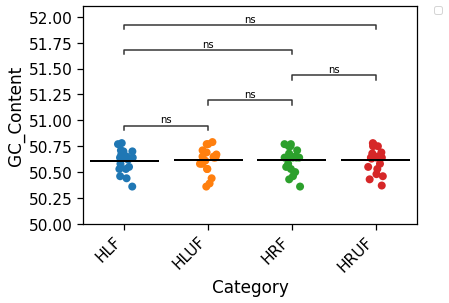

In [23]:
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="GC_Content", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="GC_Content",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(50, 52)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1e.png', dpi=300, bbox_inches="tight")

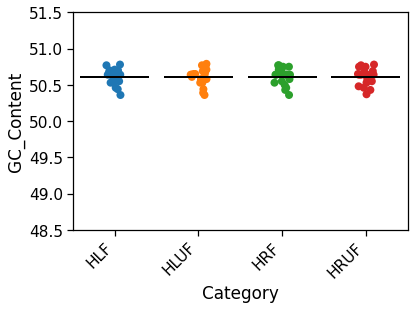

In [24]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="GC_Content", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="GC_Content",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(48.5, 51.5)

plt.savefig('12122022_EcoliPlasmidDetection_S1e.png', dpi=300, bbox_inches="tight")

In [25]:
#One way ANOVA to see overall impact on N50 on Type
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('N50 ~ C(Category)', data=quast).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Category),0.318997


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HLF vs. HLUF: t-test independent samples, P_val:7.503e-01 t=-3.207e-01
HLUF vs. HRF: t-test independent samples, P_val:1.147e-01 t=-1.616e+00
HRF vs. HRUF: t-test independent samples, P_val:2.557e-01 t=1.155e+00
HLF vs. HRF: t-test independent samples, P_val:6.694e-02 t=-1.889e+00
HLF vs. HRUF: t-test independent samples, P_val:2.055e-01 t=-1.289e+00


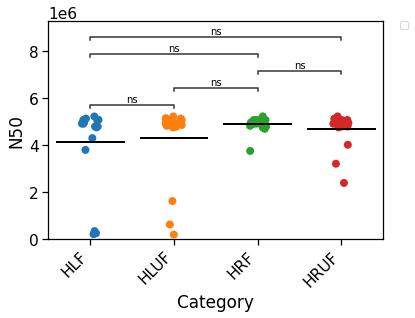

In [26]:
#Figure to show impact of Type Number_Contigs specifically in hybrid assemblies, effect mostly seen in long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("HLF", "HLUF"), ("HLF","HRF"),("HLF", "HRUF"), ("HLUF", "HRF"), ("HRF", "HRUF"))
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="N50", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="N50",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 6000000)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S1a.png', dpi=300, bbox_inches="tight")

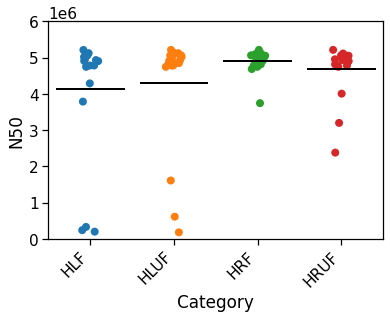

In [27]:
states_subcat =["HLF", "HLUF", "HRF", "HRUF"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="N50", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="N50",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 6000000)

plt.savefig('12122022_EcoliPlasmidDetection_S1a.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLFM: t-test independent samples, P_val:9.091e-01 t=1.149e-01
LLUF vs. LLUFM: t-test independent samples, P_val:9.897e-01 t=-1.299e-02
LRF vs. LRFM: t-test independent samples, P_val:3.702e-01 t=9.075e-01
LRUF vs. LRUFM: t-test independent samples, P_val:9.901e-01 t=-1.245e-02
LLF vs. LLFMP: t-test independent samples, P_val:8.901e-01 t=1.392e-01
LLUF vs. LLUFMP: t-test independent samples, P_val:9.999e-01 t=9.929e-05
LRF vs. LRFMP: t-test independent samples, P_val:3.498e-01 t=9.472e-01
LRUF vs. LRUFMP: t-test independent samples, P_val:9.987e-01 t=1.613e-03
LLF vs. LLUF: t-test independent samples, P_val:9.689e-01 t=-3.921e-02
LLUF vs. LRF: t-test independent samples, P_val:5.273e-02 t=-2.003e+00
LRF vs. LRUF: t-test independent samples, P_val:8.459e-02 t=1.774e+00
LLF vs. LRF: t-test independent s

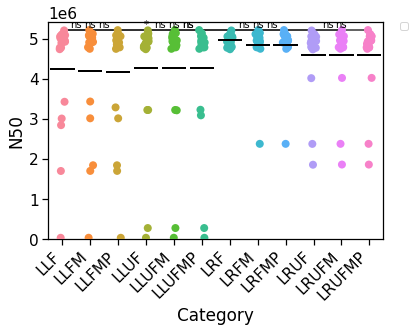

In [28]:
#figure showing impact of Type on N50 for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="N50", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="N50",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 500)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S2a.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLFM: t-test independent samples, P_val:9.091e-01 t=1.149e-01
LLUF vs. LLUFM: t-test independent samples, P_val:9.897e-01 t=-1.299e-02
LRF vs. LRFM: t-test independent samples, P_val:3.702e-01 t=9.075e-01
LRUF vs. LRUFM: t-test independent samples, P_val:9.901e-01 t=-1.245e-02
LLF vs. LLFMP: t-test independent samples, P_val:8.901e-01 t=1.392e-01
LLUF vs. LLUFMP: t-test independent samples, P_val:9.999e-01 t=9.929e-05
LRF vs. LRFMP: t-test independent samples, P_val:3.498e-01 t=9.472e-01
LRUF vs. LRUFMP: t-test independent samples, P_val:9.987e-01 t=1.613e-03
LLF vs. LLUF: t-test independent samples, P_val:9.689e-01 t=-3.921e-02
LLUF vs. LRF: t-test independent samples, P_val:5.273e-02 t=-2.003e+00
LRF vs. LRUF: t-test independent samples, P_val:8.459e-02 t=1.774e+00
LLF vs. LRF: t-test independent s

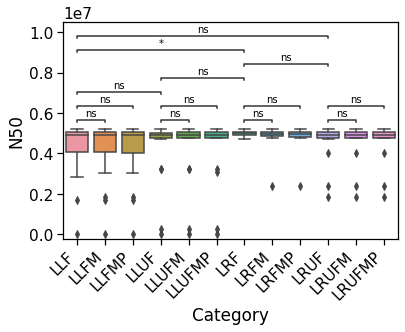

In [29]:
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="N50", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
medians = quast.groupby(['Category'])['N50'].median()
vertical_offset = quast['N50'].median() * 0.05 # offset from median for display

#for xtick in ax.get_xticks():
    #ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='b',weight='semibold')
    
import seaborn as sns
import matplotlib.pyplot as plt
#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig('12122022_EcoliPlasmidDetection_S2a.png', dpi=300, bbox_inches="tight")

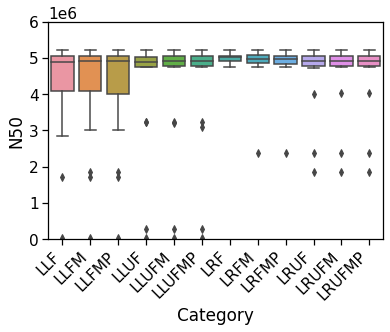

In [30]:
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'N50', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="N50", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
medians = quast.groupby(['Category'])['N50'].median()
vertical_offset = quast['N50'].median() * 0.05 # offset from median for display

#for xtick in ax.get_xticks():
    #ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='b',weight='semibold')
    
import seaborn as sns
import matplotlib.pyplot as plt

plt.ylim(0, 6000000)
plt.savefig('12122022_EcoliPlasmidDetection_S2a.png', dpi=300, bbox_inches="tight")

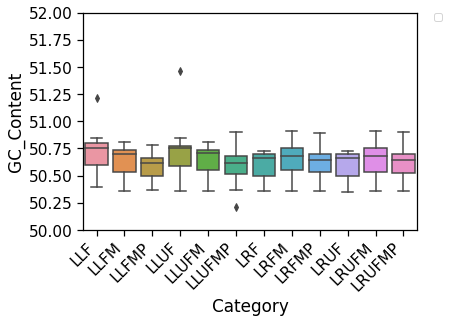

In [31]:
#figure showing impact of Type on GC_Content for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))


states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="GC_Content", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(50, 52)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('12122022_EcoliPlasmidDetection_S2e.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLFM: t-test independent samples, P_val:1.304e-01 t=1.548e+00
LLUF vs. LLUFM: t-test independent samples, P_val:2.780e-01 t=1.102e+00
LRF vs. LRFM: t-test independent samples, P_val:1.953e-01 t=-1.320e+00
LRUF vs. LRUFM: t-test independent samples, P_val:2.701e-01 t=-1.120e+00
LLF vs. LLFMP: t-test independent samples, P_val:1.959e-02 t=2.443e+00
LLUF vs. LLUFMP: t-test independent samples, P_val:7.510e-02 t=1.833e+00
LRF vs. LRFMP: t-test independent samples, P_val:4.987e-01 t=-6.835e-01
LRUF vs. LRUFMP: t-test independent samples, P_val:5.961e-01 t=-5.347e-01
LLF vs. LLUF: t-test independent samples, P_val:9.938e-01 t=7.840e-03
LLUF vs. LRF: t-test independent samples, P_val:6.837e-02 t=1.879e+00
LRF vs. LRUF: t-test independent samples, P_val:9.898e-01 t=-1.293e-02
LLF vs. LRF: t-test independent 

(<AxesSubplot:xlabel='Category', ylabel='GC_Content'>,
  <statannotations.Annotation.Annotation at 0x7f6e6b71c700>])

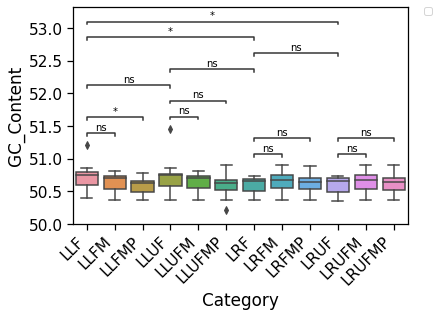

In [32]:
#figure showing impact of Type on GC_Content for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))


states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'GC_Content', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="GC_Content", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(50, 52)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLFM: t-test independent samples, P_val:3.683e-01 t=-9.111e-01
LLUF vs. LLUFM: t-test independent samples, P_val:1.000e+00 t=0.000e+00
LRF vs. LRFM: t-test independent samples, P_val:7.312e-01 t=-3.462e-01
LRUF vs. LRUFM: t-test independent samples, P_val:9.484e-01 t=-6.511e-02
LLF vs. LLFMP: t-test independent samples, P_val:3.683e-01 t=-9.111e-01
LLUF vs. LLUFMP: t-test independent samples, P_val:1.000e+00 t=0.000e+00
LRF vs. LRFMP: t-test independent samples, P_val:7.312e-01 t=-3.462e-01
LRUF vs. LRUFMP: t-test independent samples, P_val:9.484e-01 t=-6.511e-02
LLF vs. LLUF: t-test independent samples, P_val:3.195e-01 t=-1.010e+00
LLUF vs. LRF: t-test independent samples, P_val:1.128e-01 t=1.625e+00
LRF vs. LRUF: t-test independent samples, P_val:4.326e-03 t=-3.046e+00
LLF vs. LRF: t-test independe

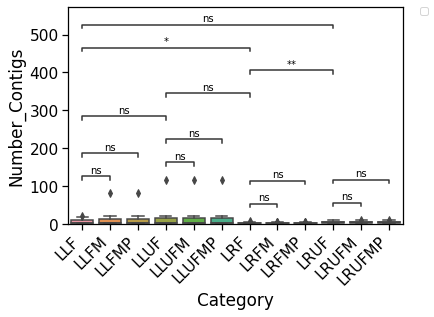

In [33]:
#figure showing impact of Type on Number_Contigs for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))

states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Number_Contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="Number_Contigs", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 500)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S2b.png', dpi=300, bbox_inches="tight")

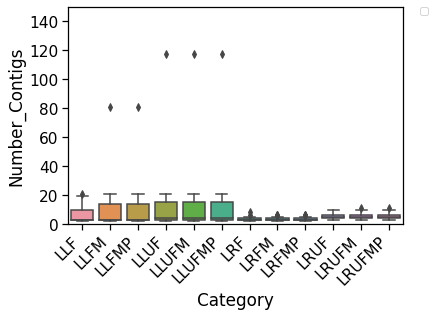

In [34]:
##### figure showing impact of Type on Number_Contigs for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))

states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Number_Contigs', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="Number_Contigs", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")


import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 150)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig('12122022_EcoliPlasmidDetection_S2b.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLFM: t-test independent samples, P_val:9.167e-01 t=1.053e-01
LLUF vs. LLUFM: t-test independent samples, P_val:9.891e-01 t=-1.377e-02
LRF vs. LRFM: t-test independent samples, P_val:3.732e-01 t=9.017e-01
LRUF vs. LRUFM: t-test independent samples, P_val:9.899e-01 t=-1.274e-02
LLF vs. LLFMP: t-test independent samples, P_val:8.952e-01 t=1.326e-01
LLUF vs. LLUFMP: t-test independent samples, P_val:9.999e-01 t=1.774e-04
LRF vs. LRFMP: t-test independent samples, P_val:3.520e-01 t=9.430e-01
LRUF vs. LRUFMP: t-test independent samples, P_val:9.988e-01 t=1.537e-03
LLF vs. LLUF: t-test independent samples, P_val:9.775e-01 t=-2.846e-02
LLUF vs. LRF: t-test independent samples, P_val:5.031e-02 t=-2.025e+00
LRF vs. LRUF: t-test independent samples, P_val:8.427e-02 t=1.776e+00
LLF vs. LRF: t-test independent s

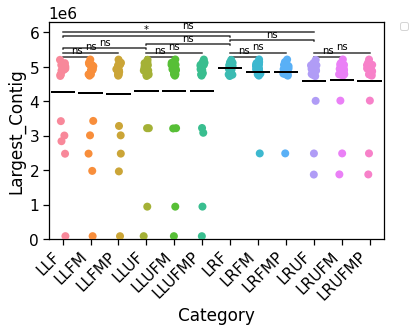

In [35]:
#figure showing impact of Type on Largest_Contig for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest_Contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Largest_Contig", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Largest_Contig",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1000000)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S2c.png', dpi=300, bbox_inches="tight")

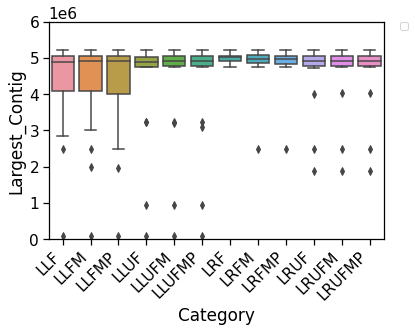

In [36]:
#figure showing impact of Type on Largest_Contig for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

#pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Largest_Contig', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="Largest_Contig", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")

import seaborn as sns
import matplotlib.pyplot as plt


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 6000000)
plt.savefig('12122022_EcoliPlasmidDetection_S2c.png', dpi=300, bbox_inches="tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLF vs. LLFM: t-test independent samples, P_val:9.335e-01 t=-8.404e-02
LLUF vs. LLUFM: t-test independent samples, P_val:9.853e-01 t=-1.852e-02
LRF vs. LRFM: t-test independent samples, P_val:9.706e-01 t=-3.713e-02
LRUF vs. LRUFM: t-test independent samples, P_val:9.351e-01 t=-8.196e-02
LLF vs. LLFMP: t-test independent samples, P_val:9.679e-01 t=-4.053e-02
LLUF vs. LLUFMP: t-test independent samples, P_val:9.907e-01 t=1.170e-02
LRF vs. LRFMP: t-test independent samples, P_val:9.563e-01 t=5.520e-02
LRUF vs. LRUFMP: t-test independent samples, P_val:9.913e-01 t=-1.104e-02
LLF vs. LLUF: t-test independent samples, P_val:8.396e-01 t=-2.039e-01
LLUF vs. LRF: t-test independent samples, P_val:5.878e-01 t=-5.469e-01
LRF vs. LRUF: t-test independent samples, P_val:9.913e-01 t=1.101e-02
LLF vs. LRF: t-test independe

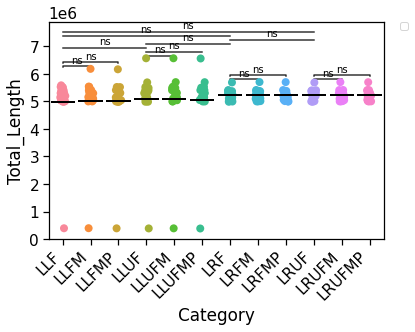

In [37]:
#figure showing impact of Type on Total_Length for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total_Length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Total_Length", data=quast, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Total_Length",
            data=quast,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(0, 1200000)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.savefig('12122022_EcoliPlasmidDetection_S2d.png', dpi=300, bbox_inches="tight")

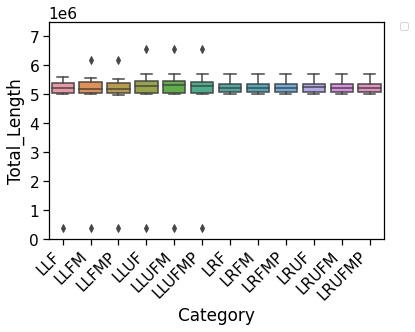

In [38]:
#figure showing impact of Type on Total_Length for long read assemblies
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("LLF", "LLUF"), ("LLF","LRF"),("LLF", "LRUF"), ("LLUF", "LRF"), ("LRF", "LRUF"), ('LLF', 'LLFM'), ('LLF', 'LLFMP'), ('LLUF', 'LLUFM'), ('LLUF', 'LLUFMP'), ("LRF", "LRFM"), ('LRF', 'LRFMP'), ('LRUF', 'LRUFM'), ('LRUF', 'LRUFMP'))
states_subcat =["LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': quast,'x': 'Category', 'y': 'Total_Length', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.boxplot(x="Category", y="Total_Length", data=quast, order=states_subcat)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 7500000)

import seaborn as sns
import matplotlib.pyplot as plt

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig('12122022_EcoliPlasmidDetection_S2d.png', dpi=300, bbox_inches="tight")